<a href="https://colab.research.google.com/github/russkarki7/Concept-and-technology-of-ai/blob/main/RussKarki_2436484_Classification_FinalAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libraries

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.feature_selection import SelectKBest, chi2

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/RussKarki_2436484_FinalAssignment/heart_disease_health_indicators_BRFSS2015.csv")

print(df.shape)
df.head()


(253680, 22)


,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


Basic Data Understanding

In [ ]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   Diabetes              253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.094186,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.296921,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.292087,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.698160,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


Check Missing Values

In [ ]:
df.isnull().sum().sort_values(ascending=False)


,0
HeartDiseaseorAttack,0
HighBP,0
HighChol,0
CholCheck,0
BMI,0
Smoker,0
Stroke,0
Diabetes,0
PhysActivity,0
Fruits,0


Target Distribution (Imbalance Check)

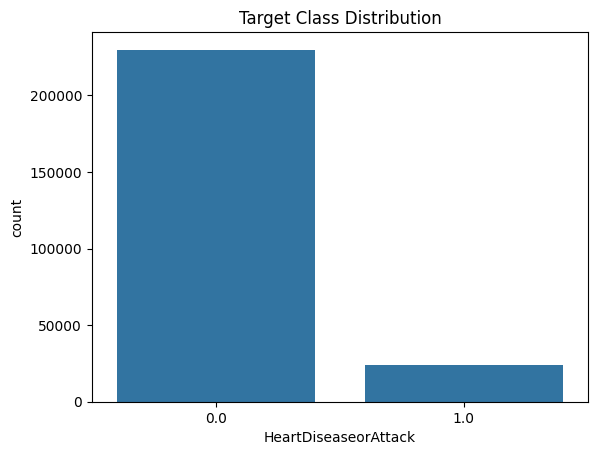

,proportion
HeartDiseaseorAttack,
0.0,0.905814
1.0,0.094186


In [ ]:
sns.countplot(x="HeartDiseaseorAttack", data=df)
plt.title("Target Class Distribution")
plt.show()

df["HeartDiseaseorAttack"].value_counts(normalize=True)


Correlation Heatmap (Top Features Only)

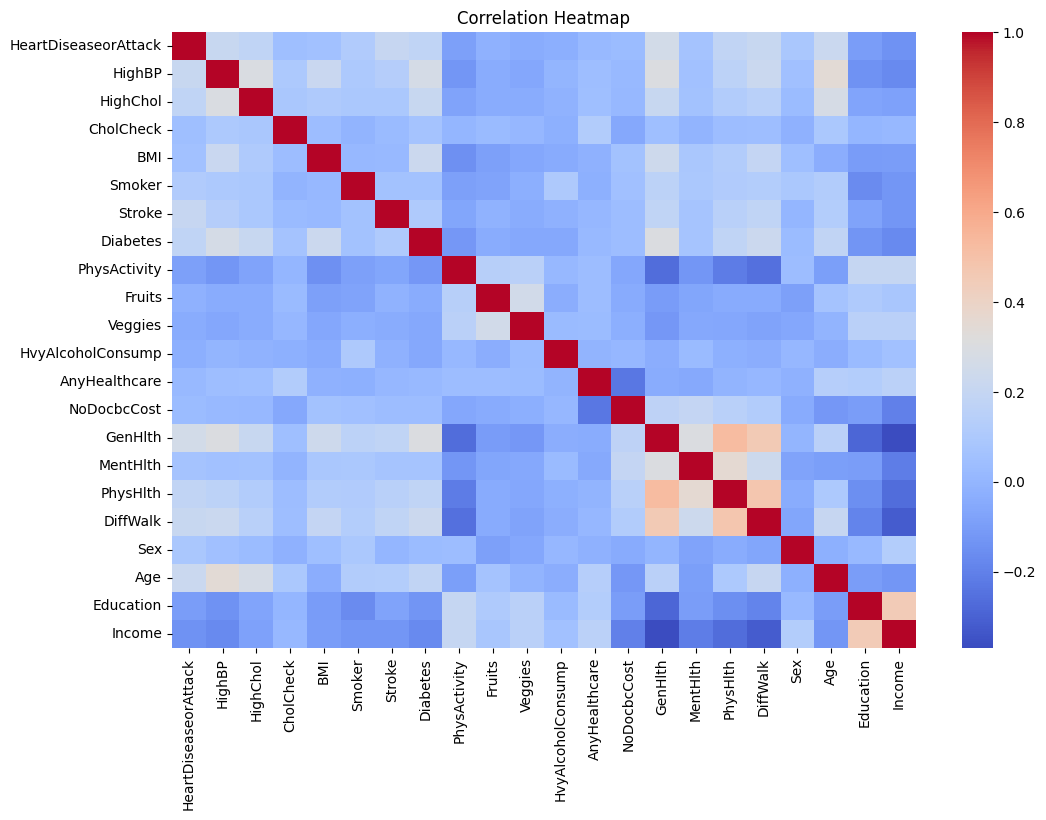

In [ ]:
plt.figure(figsize=(12,8))
corr = df.corr()
sns.heatmap(corr, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


Split Features & Target

In [ ]:
X = df.drop("HeartDiseaseorAttack", axis=1)
y = df["HeartDiseaseorAttack"]


Train/Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


Feature Scaling (Important for NN & KNN)

In [ ]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


:Neural Network Model (MLP)

In [ ]:
mlp = MLPClassifier(
    hidden_layer_sizes=(64, 32),
    activation='relu',
    solver='adam',
    max_iter=300,
    random_state=42
)

mlp.fit(X_train_scaled, y_train)

y_pred_mlp = mlp.predict(X_test_scaled)

print("MLP Results")
print("Accuracy:", accuracy_score(y_test, y_pred_mlp))
print("Precision:", precision_score(y_test, y_pred_mlp))
print("Recall:", recall_score(y_test, y_pred_mlp))
print("F1:", f1_score(y_test, y_pred_mlp))


MLP Results
Accuracy: 0.9028894670450962
Precision: 0.45493300852618757
Recall: 0.15630885122410546
F1: 0.23267403831178943


Primary Models (Two Classical Models)
Model 1 — Logistic Regression

In [ ]:
log_model = LogisticRegression(max_iter=1000)

log_model.fit(X_train_scaled, y_train)
y_pred_log = log_model.predict(X_test_scaled)

print("Logistic Regression")
print(classification_report(y_test, y_pred_log))


Logistic Regression
              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95     45957
         1.0       0.53      0.13      0.20      4779

    accuracy                           0.91     50736
   macro avg       0.72      0.56      0.58     50736
weighted avg       0.88      0.91      0.88     50736



Model 2 — Decision Tree

In [ ]:
tree_model = DecisionTreeClassifier(random_state=42)

tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

print("Decision Tree")
print(classification_report(y_test, y_pred_tree))


Decision Tree
              precision    recall  f1-score   support

         0.0       0.92      0.91      0.92     45957
         1.0       0.24      0.27      0.25      4779

    accuracy                           0.85     50736
   macro avg       0.58      0.59      0.58     50736
weighted avg       0.86      0.85      0.85     50736



Cross Validation Scores

In [ ]:
cv_log = cross_val_score(log_model, X_train_scaled, y_train, cv=5)
cv_tree = cross_val_score(tree_model, X_train, y_train, cv=5)

print("Logistic CV Mean:", cv_log.mean())
print("Tree CV Mean:", cv_tree.mean())


Logistic CV Mean: 0.9078070789267925
Tree CV Mean: 0.8511264235395262


Hyperparameter Tuning — GridSearchCV  Logistic Regression Grid

In [ ]:
log_params = {
    "C": [0.01, 0.1, 1, 10],
    "solver": ["liblinear", "lbfgs"]
}

grid_log = GridSearchCV(LogisticRegression(max_iter=1000),
                        log_params,
                        cv=5,
                        scoring="f1")

grid_log.fit(X_train_scaled, y_train)

best_log = grid_log.best_estimator_
print("Best Logistic Params:", grid_log.best_params_)
print("Best CV Score:", grid_log.best_score_)


Best Logistic Params: {'C': 10, 'solver': 'liblinear'}
Best CV Score: 0.20907456870378383


Decision Tree Grid

In [ ]:
tree_params = {
    "max_depth": [3,5,10,None],
    "min_samples_split": [2,5,10]
}

grid_tree = GridSearchCV(DecisionTreeClassifier(),
                         tree_params,
                         cv=5,
                         scoring="f1")

grid_tree.fit(X_train, y_train)

best_tree = grid_tree.best_estimator_
print("Best Tree Params:", grid_tree.best_params_)
print("Best CV Score:", grid_tree.best_score_)


Best Tree Params: {'max_depth': None, 'min_samples_split': 10}
Best CV Score: 0.2629347423732956


Feature Selection (Filter Method — Chi-Square)

In [ ]:
selector = SelectKBest(score_func=chi2, k=10)

X_train_fs = selector.fit_transform(X_train, y_train)
X_test_fs = selector.transform(X_test)

selected_features = X.columns[selector.get_support()]

print("Selected Features:")
print(selected_features)


Selected Features:
Index(['HighBP', 'HighChol', 'Stroke', 'Diabetes', 'GenHlth', 'MentHlth',
       'PhysHlth', 'DiffWalk', 'Age', 'Income'],
      dtype='object')


Final Models with Selected Features


Logistic Regression Final

In [ ]:
best_log.fit(X_train_fs, y_train)
y_final_log = best_log.predict(X_test_fs)


Decision Tree Final

In [ ]:
best_tree.fit(X_train_fs, y_train)
y_final_tree = best_tree.predict(X_test_fs)


Final Evaluation Function

In [ ]:
def evaluate_model(name, y_true, y_pred):
    print(f"\n{name}")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1:", f1_score(y_true, y_pred))


Final Results

In [ ]:
evaluate_model("Final Logistic", y_test, y_final_log)
evaluate_model("Final Tree", y_test, y_final_tree)



Final Logistic
Accuracy: 0.9066934720908231
Precision: 0.5245901639344263
Recall: 0.10043942247332077
F1: 0.16859852476290832

Final Tree
Accuracy: 0.8911818038473668
Precision: 0.33166969147005443
Recall: 0.15296087047499476
F1: 0.20936560217671488


Comparison Table (For Report)

In [ ]:
results = pd.DataFrame({
    "Model": ["Logistic", "Decision Tree"],
    "Accuracy": [
        accuracy_score(y_test, y_final_log),
        accuracy_score(y_test, y_final_tree)
    ],
    "Precision": [
        precision_score(y_test, y_final_log),
        precision_score(y_test, y_final_tree)
    ],
    "Recall": [
        recall_score(y_test, y_final_log),
        recall_score(y_test, y_final_tree)
    ],
    "F1": [
        f1_score(y_test, y_final_log),
        f1_score(y_test, y_final_tree)
    ]
})

results


,Model,Accuracy,Precision,Recall,F1
0,Logistic,0.906693,0.52459,0.100439,0.168599
1,Decision Tree,0.891182,0.33167,0.152961,0.209366
